<a href="https://colab.research.google.com/github/eadewusic/Tensorflow_Participation_Assignment/blob/main/Tensorflow_Participation_Assignment_Eunice_Nina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Cells 1 - 23 done by Eunice Adewusi
Cells 24 - 32 done by Nina
'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d hojjatk/mnist-dataset

Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
100% 22.0M/22.0M [00:00<00:00, 68.3MB/s]
100% 22.0M/22.0M [00:00<00:00, 68.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('mnist-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from tensorflow.keras.datasets import mnist

In [ ]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
Y_test.shape

(10000,)

In [ ]:
# Preprocess X (features)
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape to (28, 28, 1)
X_test = X_test / 255.0  # Normalize pixel values to [0, 1]
X_test = X_test.reshape(-1, 28, 28, 1)  # Reshape to (28, 28, 1)

In [ ]:
# Preprocess Y (labels)
Y_train = tf.keras.utils.to_categorical(Y_train, 10)  # One-hot encode
Y_test = tf.keras.utils.to_categorical(Y_test, 10)  # One-hot encode

In [ ]:
# Check shapes to confirm
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


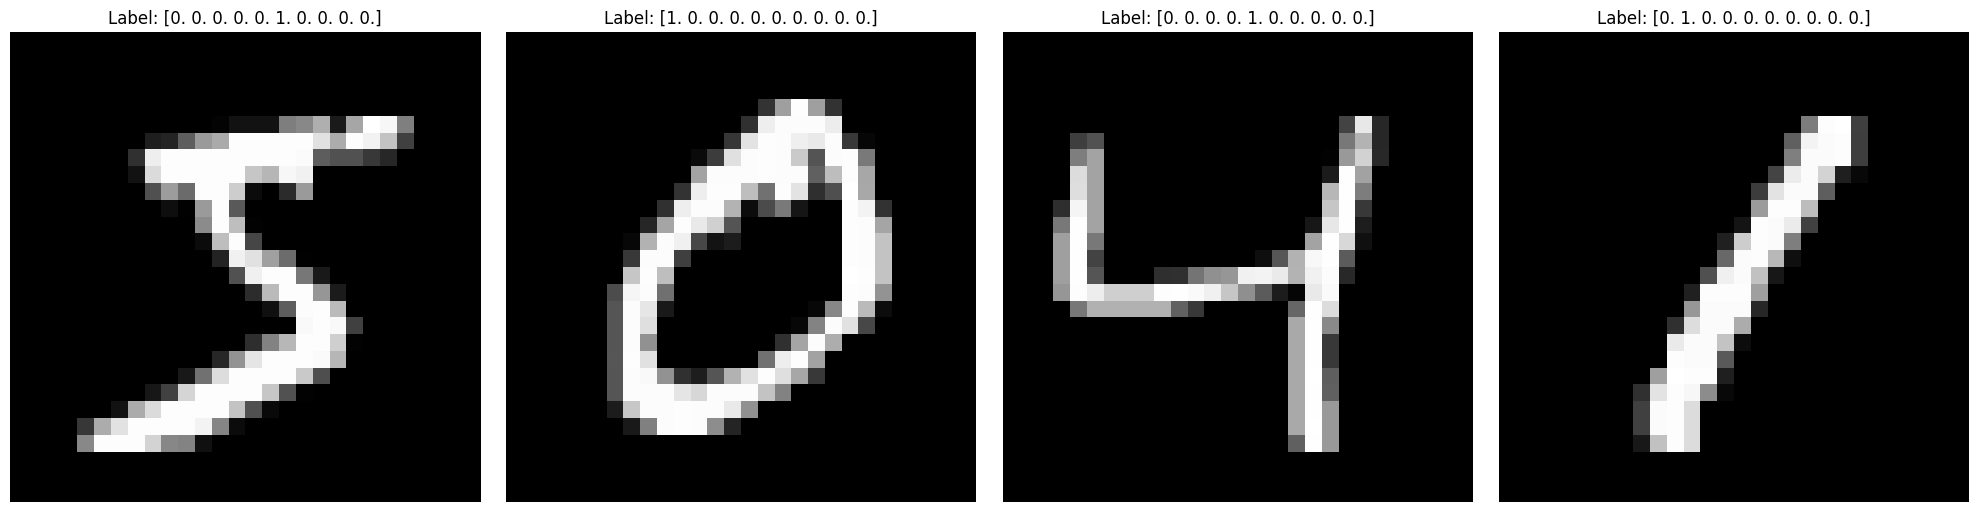

In [ ]:
# Print 4 images in a row
plt.figure(figsize=(20, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#Assume i have pre-processing
num_classes = Y_train.shape[1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

In [ ]:
model = Sequential()
#keras.Input(shape=(None, None, 3))
model.add(Input(shape=(28, 28, 1))) #This is my hidden layer 1
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # this is the output layer

In [ ]:
model.compile(metrics=['accuracy'], optimizer='adam', loss='categorical_crossentropy')

In [ ]:
model.fit(X_train,Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8749 - loss: 0.4252
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9688 - loss: 0.1025
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9794 - loss: 0.0660
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9831 - loss: 0.0517
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9868 - loss: 0.0394
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9898 - loss: 0.0310
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9915 - loss: 0.0238
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9913 - loss: 0.0252
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0183
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9948 - loss: 0.0159


In [ ]:
model.save('mnist.keras')

In [ ]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[7.6169782e-12, 3.9789989e-09, 3.7055254e-09, ..., 9.9999994e-01,
        4.5902076e-12, 1.5574622e-08],
       [3.4907277e-12, 1.0235653e-12, 9.9999994e-01, ..., 4.1361676e-14,
        1.6734899e-12, 6.8956803e-18],
       [1.0789039e-08, 9.9997813e-01, 1.3279862e-06, ..., 1.9203660e-05,
        9.2523067e-07, 1.0131036e-08],
       ...,
       [6.1619069e-22, 2.9593548e-17, 1.3070446e-23, ..., 3.9008730e-11,
        3.0108569e-14, 9.1483494e-11],
       [2.9003324e-18, 1.9001335e-18, 6.6576149e-19, ..., 1.1440775e-13,
        1.2202617e-09, 1.3513982e-15],
       [7.3120194e-14, 4.3239849e-20, 8.8887181e-17, ..., 6.6772343e-16,
        4.7413128e-12, 5.4282939e-20]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
loaded_model=load_model('mnist.keras')


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)